In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
np.random.seed(5)

In [80]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [81]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,

                                               init='random'))]

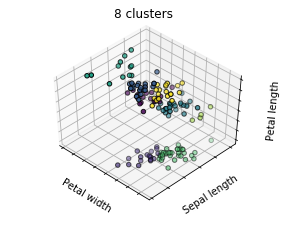

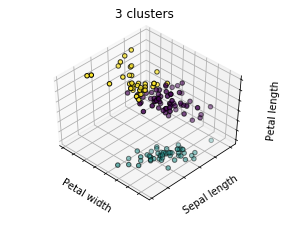

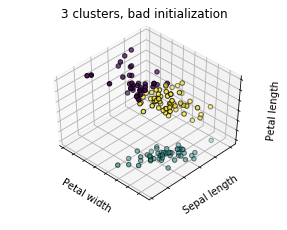

In [86]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

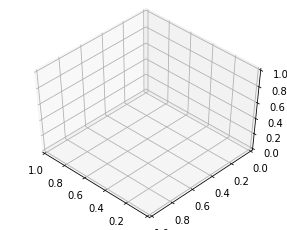

In [83]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

In [84]:
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

In [85]:
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

/home/mandy/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


# Using Make_blob

In [3]:
from sklearn.datasets import make_blobs

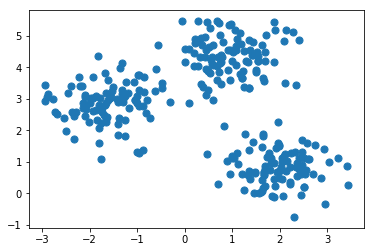

In [4]:
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

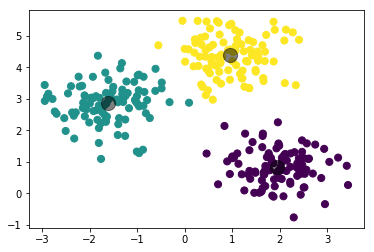

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Elbow Method 

In [7]:
from scipy.spatial.distance import cdist
from sklearn import metrics

In [8]:
distortions = []
K = range(1, 10)

In [9]:
X.shape[0]

300

In [10]:
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(X)
    distortions.append(sum(np.min(cdist(X, kmean.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [11]:
kmean.cluster_centers_

array([[ 1.45027303,  1.43965273],
       [-1.13467251,  3.23333137],
       [ 0.70140832,  3.82722988],
       [ 1.71199855,  0.41728511],
       [-2.19533527,  2.91379308],
       [ 2.52224722,  0.90984001],
       [ 0.50406285,  4.94552215],
       [-1.60095859,  1.96989343],
       [ 1.60132927,  4.44838812]])

In [12]:
cdist(X, kmean.cluster_centers_, 'euclidean').shape

(300, 9)

In [13]:
np.min(cdist(X, kmean.cluster_centers_, 'euclidean'), axis=1).shape

(300,)

In [14]:
distortions

[2.155550660986752,
 1.3107633424092735,
 0.7449068201503807,
 0.6861181822884652,
 0.6319858931466104,
 0.5936073001937503,
 0.5519521567834977,
 0.5266859937619,
 0.4875446107690834]

In [15]:
np.min([[200,500], 
            [100, 50]], axis=1)

array([200,  50])

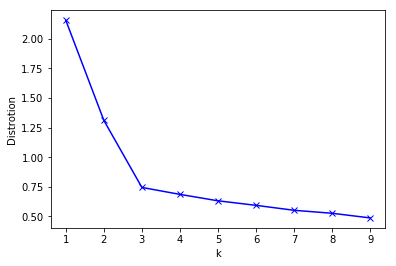

In [16]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distrotion')
plt.show()

# Silhouette Score

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
for n in range(2, 11):
    kmean = KMeans(n_clusters = n).fit(X)
    label = kmean.labels_
    sil_coeff = silhouette_score(X, label, metric = 'euclidean')
    print(sil_coeff)

0.5532539715531537
0.6596332095691734
0.5407975624285217
0.4434589851710526
0.3217175623272313
0.32669645357144916
0.33844518932279377
0.3529167067775139
0.34540605780634254


# For Understanding the above code

In [182]:
X_new = [[4, 5], [3, 4], [10, 9], [9, 8]]

In [195]:
c = [[1, 2], 
    [2, 2]]

In [200]:
cdist([[3, 4]], [[1, 2]], 'euclidean')

array([[2.82842712]])

In [187]:
cd = cdist(X_new, c, 'euclidean')

In [199]:
cd

array([[ 4.24264069,  3.60555128],
       [ 2.82842712,  2.23606798],
       [11.40175425, 10.63014581],
       [10.        ,  9.21954446]])

In [206]:
sum(np.argmin(cd, axis=1)

array([1, 1, 1, 1])

In [203]:
s = sum(np.min(cd, axis=1))

In [204]:
s

25.691309522991315

#  K-Means from scatch

In [ ]:
class Kmeans():
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

In [311]:
k=3
max_iter = 100

In [312]:
def fit(data, k, max_iter):
    C = []
    n = k+k
    centroids = np.array((np.random.sample(n).tolist())).reshape(k, 2)
    
    for iters in range(max_iter):
        edist = cdist(data, centroids, 'euclidean')
        C = np.array(np.argmin(edist, axis=1))
        centroids = np.array([X[C == K].mean(axis = 0) for K in range(k)])
    print("edist shape:", edist.shape)
    print("C shape:", C.shape)
    print("Centroids shape:", centroids.shape)

    return centroids, C

In [313]:
# km = Kmeans(k=3)

In [314]:
cent, Cc = fit(X, k, max_iter)

edist shape: (300, 3)
C shape: (300,)
Centroids shape: (3, 2)


In [315]:
cent

array([[ 0.94768845,  4.35742647],
       [-1.62528103,  2.85866798],
       [ 1.95159369,  0.83467497]])

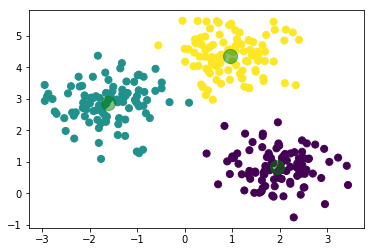

In [316]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = cent
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5);

In [319]:
Cc

array([0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2,
       1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0])

In [146]:
def Kmeans(X, K, maxIters = 100):

#     centroids = X[np.random.choice(np.arange(len(X)), K), :]
    centroids = np.random.sample(K+K).reshape(K, 2) * 10
    print(centroids)
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(xi-yk, xi-yk) for yk in centroids]) for xi in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids) , C

In [147]:
centroids, C = Kmeans(X, 3)

[[3.73600124 6.68134805]
 [3.39848664 5.7279387 ]
 [3.25807158 4.45145049]]


/home/mandy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.


In [148]:
centroids

array([[0.4332436 , 2.68858567],
       [       nan,        nan],
       [       nan,        nan]])

In [141]:
C

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1])

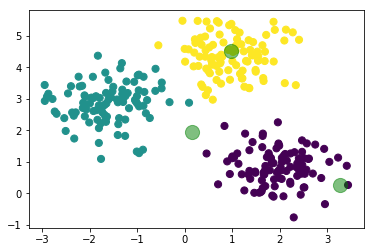

In [142]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5);

# Understanding the code

In [105]:
centroids = X[np.random.choice(np.arange(len(X)), K), :]
centroids.shape

(1, 2, 3, 4, 5, 6, 7, 8, 9, 2)

In [103]:
X.shape

(300, 2)

In [128]:
np.random.sample(3+3).reshape(3, 2) * 10

array([[5.44649018, 7.80314765],
       [3.06363532, 2.21957884],
       [3.87971258, 9.3638365 ]])

In [122]:
np.random.randint(9)

3